# Import data

In [1]:
import pandas as pd

df = pd.read_csv("Walmart_sales.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


# Data Exploration

## Individual Feature Exploration

### Stores

In [32]:
# r = df.groupby("Store").describe()
# r

### Date

### Weekly Sales

### Holiday Flag

### Tempature

### Fuel Price

<AxesSubplot:>

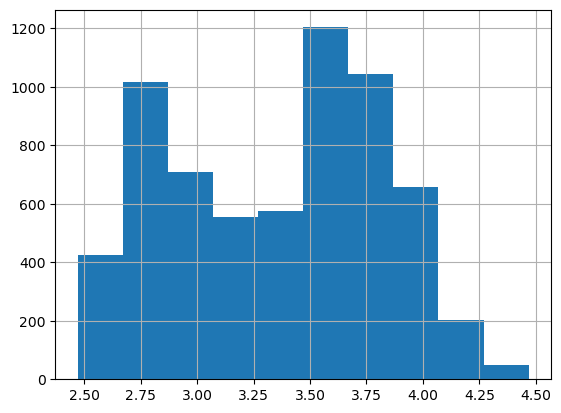

In [4]:
#view histogram for fuel price
df['Fuel_Price'].hist()

We have a bimodal distribution for our fuel prices 

In [5]:
#view summary statistics
mean = df['Fuel_Price'].mean()
stdDev = df['Fuel_Price'].std()


print(f"mean: {mean}")
print(f"Standard Devation: {stdDev}")


mean: 3.358606837606838
Standard Devation: 0.4590197071928525


### Consumer Price Index

<Axes: >

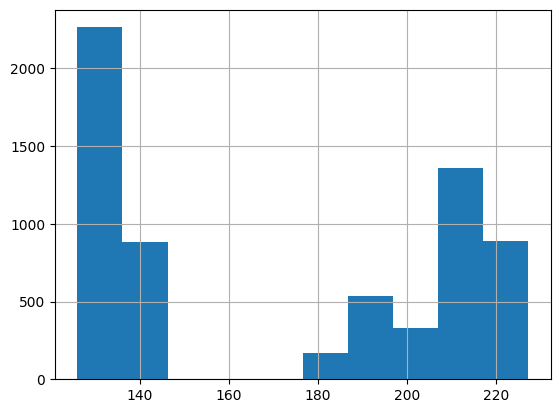

In [6]:
#view histogram
df['CPI'].hist()

it looks like we have a really weird discrete set of values. I wonder why there seems to be a chunk missing. From my understanding CPI is a continuous index that doesn't simply jump out like that. 

To dig deeper into why this occured let's look at CPI for each store (it should be roughly the same because the data is from the same time frame but it help determine the cause).  

<Axes: >

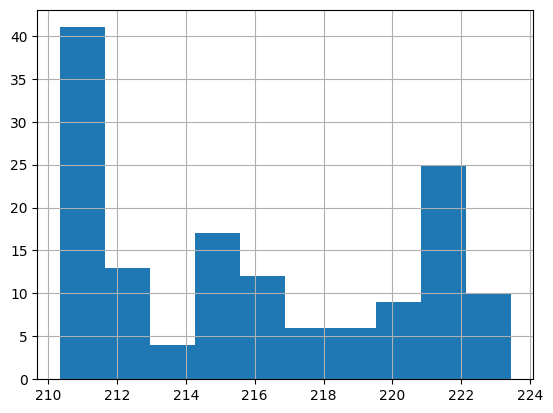

In [7]:
#histogram for store1
df[df['Store'] == 1]['CPI'].hist()

In [12]:
frame = df[df['Store'] == 1]['CPI']
print(f"Range: [{frame.min()}, {frame.max()}]")


Range: [210.3374261, 223.4442513]


It looks store 1 is continuous in the rough range [210, 223]

<Axes: >

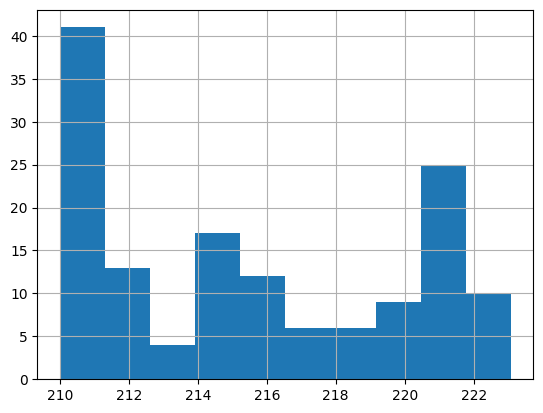

In [13]:
#view histogram of cpi for store 2
df[df['Store'] == 2]['CPI'].hist()


In [15]:
frame = df[df['Store'] == 2]['CPI']
print(f"Range: [{frame.min()}, {frame.max()}]")


Range: [209.9984585, 223.0783366]


Store 2's CPI values seem to be continuous in a very similar range as store 1

<Axes: >

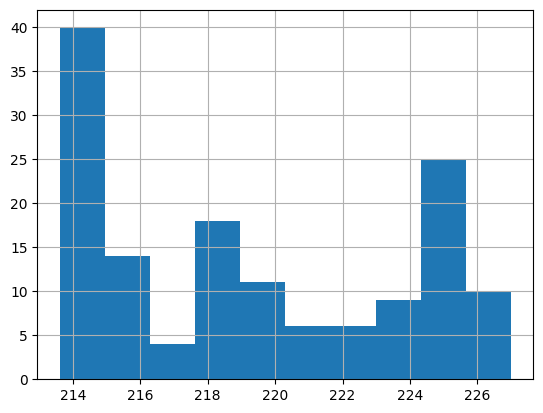

In [16]:
#view histogram of CPI's for store 3
df[df['Store'] == 3]['CPI'].hist()


In [17]:
frame = df[df['Store'] == 3]['CPI']
print(f"Range: [{frame.min()}, {frame.max()}]")


Range: [213.6196139, 226.9873637]


Again, very similar range of CPI values. So, stores 1, 2, and 3 all have similar CPI ranges and store 4 seems to be an outlier in the CPI data

<Axes: >

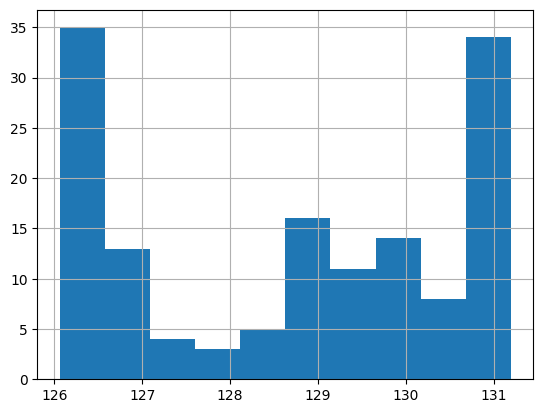

In [18]:
#view histogram of CPI values for store 4
df[df['Store'] == 4]['CPI'].hist()


In [19]:
frame = df[df['Store'] == 4]['CPI']
print(f"Range: [{frame.min()}, {frame.max()}]")

Range: [126.064, 131.1930968]


As suspected, store 4 is completely misasligned with the other stores in terms of it's CPI values. Hence, why we had that huge gap in data in the histogram of ALL CPI values. 

### Unemployment

<AxesSubplot:>

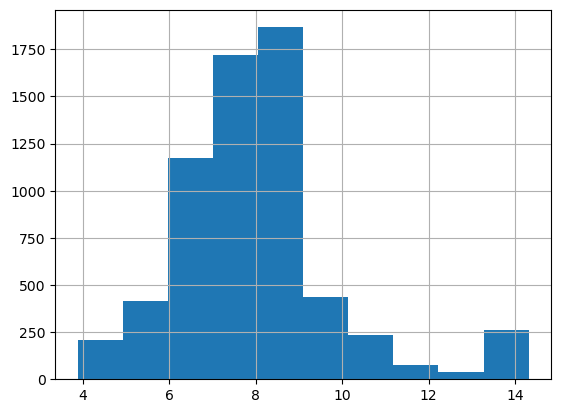

In [23]:
df['Unemployment'].hist()

## Feature vs Sales

### Holiday vs Sales

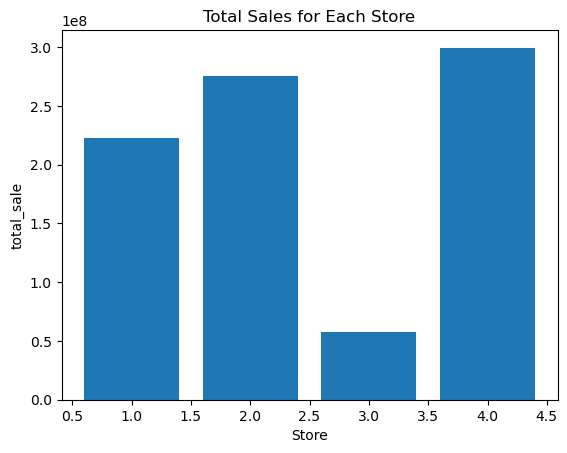

In [37]:
import matplotlib.pyplot as plt

Sales = df[(df['Store'] > 0) & (df['Store'] < 5)].groupby('Store')['Weekly_Sales'].sum() 

plt.bar(Sales.index, Sales)
plt.xlabel('Store')
plt.ylabel('total_sale')
plt.title('Total Sales for Each Store')
plt.show()


For the first four stores, there is a substantial difference between store 3 compared to the rest of the stores. Hence, the third store has a lower weekly revenue rate compared to the other stores.

### Tempature vs Sales

### Fuel Price vs Sales

### CPI vs Sales

### Unemployment vs Sales